In [2]:
# 2) Installer les librairies
!pip install -Uqq fastbook
import fastbook
from fastbook import *

     |████████████████████████████████| 727kB 5.8MB/s 
     |████████████████████████████████| 51kB 4.9MB/s 
     |████████████████████████████████| 1.2MB 10.4MB/s 
     |████████████████████████████████| 194kB 20.4MB/s 
     |████████████████████████████████| 61kB 5.8MB/s 


In [3]:
# 3) Tout importer de fastai.vision.all
from fastai.vision.all import *
from fastai.vision.widgets import *

In [5]:
# Import the os module
import os
# Get the current working directory
cwd = os.getcwd()
# Print the current working directory
print("Current working directory: {0}".format(cwd))
print(os.getcwd)

Current working directory: /content
<built-in function getcwd>


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
file_path = '/content/drive/MyDrive/Colab Notebooks/chest_xray/chest_xray'

path_data = Path('/content/drive/MyDrive/Colab Notebooks/chest_xray/chest_xray/train/')

In [9]:
# 5) Créer un dataloader (variable) grâce à l'API DataBlock()
# Exemple : « nom de votre dataloader » = DataBlock(
#     blocks=(ImageBlock, CategoryBlock), 
#     get_items=....., 
#     splitter=....,
#     get_y=.....,
#     item_tfms=Resize(128))
my_datablock = DataBlock(
            blocks=(ImageBlock, CategoryBlock), 
            get_items= get_image_files, 
            splitter = RandomSplitter(valid_pct= 0.2, seed=76),
            get_y = parent_label,
            item_tfms = Resize(128))

In [10]:
# 5) Après avoir créé notre objet, nous devons dire à fastai où récupérer la data
# dataset =  « nom de votre dataloader ».dataloaders(path)
dataset = my_datablock.dataloaders(path_data)

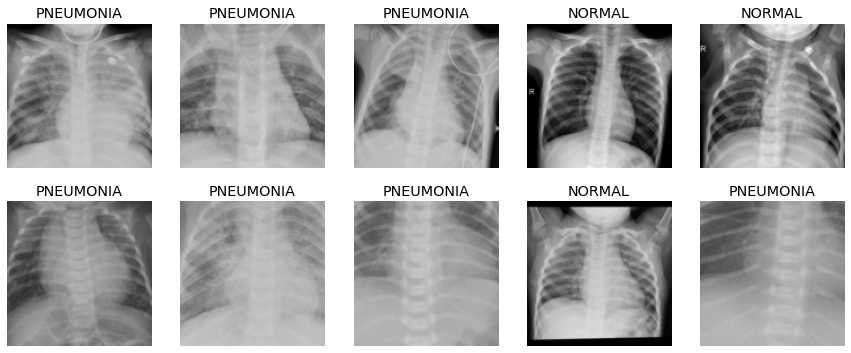

In [16]:
# 6) Visualiser une dizaine d’images de votre dataset avec la méthode show_batch(max_n =10)
dataset.valid.show_batch(max_n = 10, nrows=2)

In [17]:
# 7) Créer un réseau de neurones avec la classe cnn_learner(). Y préciser dans les paramètres votre dataset, le model d’architecture pour le transfer learning, et error_rate comme métrique)
# utiliser resnet18 ou resnet34

rnn = cnn_learner(dataset, resnet18, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [18]:
rnn.fine_tune(3)



In [19]:
rnn.save('Modele_Rnn2')

Path('models/Modele_Rnn2.pth')

In [20]:
# 9) Analyser le modèle créé 
# interp= ClassificationInterpretation.from_learner(« nom de votre cnn »)
# interp.most_confused(min_val=3)
interp= ClassificationInterpretation.from_learner(rnn)
interp.most_confused(min_val=3)

[('NORMAL', 'PNEUMONIA', 14), ('PNEUMONIA', 'NORMAL', 10)]

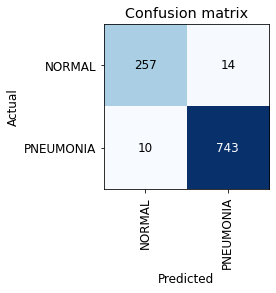

In [21]:
# 10) Afficher la matrice de confusion avec la méthode plot_confusion_matrix()
interp.plot_confusion_matrix()

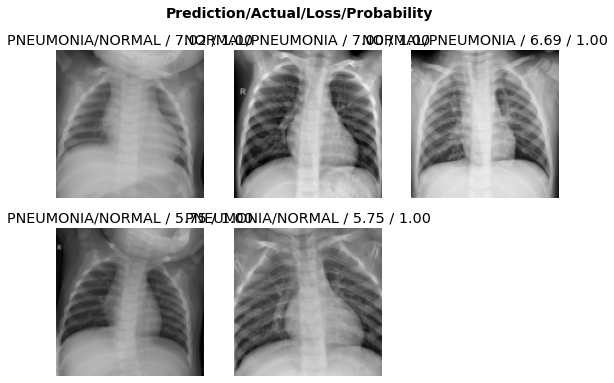

In [24]:
# 11)  Afficher les 10 images ayant les loss les plus élevées avec la méthode
# plot_top_losses().
interp.plot_top_losses(5)

In [28]:
# 12. Exporter votre modèle avec la méthode du même nom
rnn.export()

In [29]:
# 13. Dans une nouvelle variable, importer le modèle venant d’etre créé avec la fonction
# load_learner(). Puis charger quelques images de votre dossier test pour vérification avec méthode predict()
rnntest = load_learner('export.pkl')

In [33]:
rnntest.predict('/content/drive/MyDrive/Colab Notebooks/chest_xray/chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg')

('NORMAL', tensor(0), tensor([0.9502, 0.0498]))

In [34]:
rnntest.dls.vocab

['NORMAL', 'PNEUMONIA']